In [124]:
import numpy as np
import pylab as plt
import math

In [125]:
def CreatCross(n):
    
    Sickness=(n)//8+1
    
    Cross=np.zeros((n,n))
    
    for i in range(n):
        for j in range(n):
            if abs(i-j)<Sickness or abs(i+j-n+1)<Sickness:
                Cross[i,j]=1
    return Cross

CreatCross(3)

array([[1., 0., 1.],
       [0., 1., 0.],
       [1., 0., 1.]])

In [126]:
def CreatRound(n):
    
    if n==3:
        return np.array([[0,1,0],[1,0,1],[0,1,0]])
    
    Sickness=(n)//8+1
    
    Cross=np.zeros((n,n))
    
    for i in range(n):
        for j in range(n):
            r=(i-(n-1)/2)*(i-(n-1)/2)+(j-(n-1)/2)*(j-(n-1)/2)
            if (n)/4<math.sqrt(r)<n/2:
                Cross[i,j]=1
    return Cross

CreatRound(3)

array([[0, 1, 0],
       [1, 0, 1],
       [0, 1, 0]])

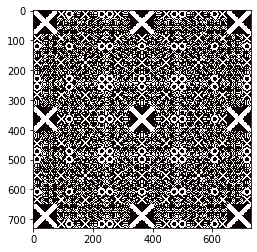

In [136]:
deapth=4

def CreatFrame(mat):
    
    
    
    rank=np.sum(np.absolute(mat))
    
    #print(mat[0,:],mat[1,:],mat[2,:])
    t=[[0,0,0],[0,0,0],[0,0,0]]
    
    for i in range(3):
        for j in range(3):
            
            if mat[i,j]==1:
                t[i][j]=CreatCross(int(3**(deapth+1-rank))) 
            elif mat[i,j]==-1:
                t[i][j]=CreatRound(int(3**(deapth+1-rank)))
            elif rank==deapth:
                t[i][j]=np.zeros((3,3))
                #print("ddddd")
            else:
                mat2=np.zeros((3,3))
                for k in range(3):
                    for l in range(3): 
                        mat2[k,l]=mat[k,l]
                mat2[i,j]=(-1)**rank
                #print(mat2)
                t[i][j]=CreatFrame(mat2)
    
    A=np.concatenate([t[0][0],t[0][1],t[0][2]],axis=1)
    B=np.concatenate([t[1][0],t[1][1],t[1][2]],axis=1)
    C=np.concatenate([t[2][0],t[2][1],t[2][2]],axis=1)
    #print(np.concatenate([A,B,C],axis=0))
    
    return np.concatenate([A,B,C],axis=0)

ARR=CreatFrame(np.zeros((3,3)))
im = plt.imshow(ARR, cmap='hot')
plt.show()

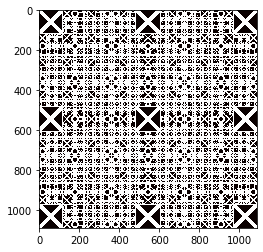

In [145]:
U0 =3 

def CreatDimCheat(U0):
    DimCheat=[]
    for i in range(deapth+1):
        DimCheat.append(U0)
        U0=U0*3+2*(i+1)
    return DimCheat

DimCheat=CreatDimCheat(U0)    #[3,11,37,117,359] #Un=Un-1*3+2*n U0=3

def CreatFrameLine(mat):
    
    rank=np.sum(np.absolute(mat))
    
    #print(mat[0,:],mat[1,:],mat[2,:])
    t=[[0,0,0],[0,0,0],[0,0,0]]
    
    for i in range(3):
        for j in range(3):
            
            if mat[i,j]==1:
                t[i][j]=CreatCross(DimCheat[int(deapth-rank)])
            elif mat[i,j]==-1:
                t[i][j]=CreatRound(DimCheat[int(deapth-rank)])
            elif rank==deapth:
                t[i][j]=np.zeros((3,3))
                #print("ddddd")
            else:
                mat2=np.zeros((3,3))
                for k in range(3):
                    for l in range(3): 
                        mat2[k,l]=mat[k,l]
                mat2[i,j]=(-1)**rank
                t[i][j]=CreatFrameLine(mat2)
    
    Line=np.ones(((t[0][0]).shape[0],int(deapth+1-rank)))
    
    A=np.concatenate([t[0][0],Line,t[0][1],Line,t[0][2]],axis=1)
    B=np.concatenate([t[1][0],Line,t[1][1],Line,t[1][2]],axis=1)
    C=np.concatenate([t[2][0],Line,t[2][1],Line,t[2][2]],axis=1)
    
    Line2=np.ones((int(deapth+1-rank),A.shape[1]))
    
    return np.concatenate([A,Line2,B,Line2,C],axis=0)

Azz=CreatFrameLine(np.zeros((3,3)))
im = plt.imshow(Azz, cmap='hot')
plt.show()

In [146]:
from PIL import Image

im = Image.fromarray(((1-Azz)*255).astype(np.uint8))
im.save('road3.bmp')

[5, 17, 55, 171, 521]


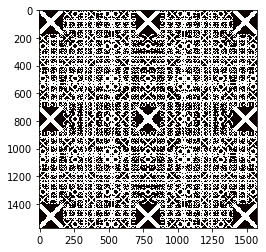

In [151]:
MinResolution=5

DimCheat=CreatDimCheat(MinResolution)
print(DimCheat)

def CreatFrameLine2(mat):
    
    rank=np.sum(np.absolute(mat))
    
    #print(mat[0,:],mat[1,:],mat[2,:])
    t=[[0,0,0],[0,0,0],[0,0,0]]
    
    for i in range(3):
        for j in range(3):
            
            if mat[i,j]==1:
                t[i][j]=CreatCross(DimCheat[int(deapth-rank)])
            elif mat[i,j]==-1:
                t[i][j]=CreatRound(DimCheat[int(deapth-rank)])
            elif rank==deapth:
                t[i][j]=np.zeros((MinResolution,MinResolution))
                #print("ddddd")
            else:
                mat2=np.zeros((3,3))
                for k in range(3):
                    for l in range(3): 
                        mat2[k,l]=mat[k,l]
                mat2[i,j]=(-1)**rank
                t[i][j]=CreatFrameLine2(mat2)
    
    Line=np.ones(((t[0][0]).shape[0],int(deapth+1-rank)))
    
    A=np.concatenate([t[0][0],Line,t[0][1],Line,t[0][2]],axis=1)
    B=np.concatenate([t[1][0],Line,t[1][1],Line,t[1][2]],axis=1)
    C=np.concatenate([t[2][0],Line,t[2][1],Line,t[2][2]],axis=1)
    
    Line2=np.ones((int(deapth+1-rank),A.shape[1]))
    
    return np.concatenate([A,Line2,B,Line2,C],axis=0)

A33=CreatFrameLine2(np.zeros((3,3)))
im = plt.imshow(A33, cmap='hot')
plt.show() 

In [153]:
im = Image.fromarray(((1-A33)*255).astype(np.uint8))
im.save('road4.bmp')

In [1]:
ResolutionAffichage=7

def Affichage(mat):
    
    t=[[0,0,0],[0,0,0],[0,0,0]]
    
    for i in range(3):
        for j in range(3):
            
            if mat[i,j]==1:
                t[i][j]=CreatCross(ResolutionAffichage)
            elif mat[i,j]==-1:
                t[i][j]=CreatRound(ResolutionAffichage)
            else:
                t[i][j]=np.zeros((ResolutionAffichage,ResolutionAffichage))
                #print("ddddd")
            
    
    Line=np.ones(((t[0][0]).shape[0],1))
    
    A=np.concatenate([t[0][0],Line,t[0][1],Line,t[0][2]],axis=1)
    B=np.concatenate([t[1][0],Line,t[1][1],Line,t[1][2]],axis=1)
    C=np.concatenate([t[2][0],Line,t[2][1],Line,t[2][2]],axis=1)
    
    Line2=np.ones((1,A.shape[1]))
    
    FinalFrame=np.concatenate([A,Line2,B,Line2,C],axis=0)
    im = plt.imshow(1-FinalFrame, cmap='hot')
    plt.show()


Affichage(np.array([[1,-1,1],[0,0,1],[-1,0,0]]))

NameError: name 'np' is not defined